# Описание проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

<h1>План проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1">Описание проекта</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-этапа-обработки" data-toc-modified-id="Описание-этапа-обработки-1.0.1">Описание этапа обработки</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.0.2">Описание данных</a></span></li></ul></li></ul></li><li><span><a href="#Реализация-проекта" data-toc-modified-id="Реализация-проекта-2">Реализация проекта</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек.-Загрузка-данных" data-toc-modified-id="Импорт-библиотек.-Загрузка-данных-2.1">Импорт библиотек. Загрузка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2.2">Анализ данных</a></span><ul class="toc-item"><li><span><a href="#1.-data_arc---данные-об-электродах" data-toc-modified-id="1.-data_arc---данные-об-электродах-2.2.1">1. data_arc - данные об электродах</a></span></li><li><span><a href="#2.-data_bulk---данные-о-подаче-сыпучих-материалов-(объем)" data-toc-modified-id="2.-data_bulk---данные-о-подаче-сыпучих-материалов-(объем)-2.2.2">2. data_bulk - данные о подаче сыпучих материалов (объем)</a></span></li><li><span><a href="#3.-data_bulk_time---данные-о-подаче-сыпучих-материалов-(время)" data-toc-modified-id="3.-data_bulk_time---данные-о-подаче-сыпучих-материалов-(время)-2.2.3">3. data_bulk_time - данные о подаче сыпучих материалов (время)</a></span></li><li><span><a href="#4.-data_gas---данные-о-продувке-сплава-газом" data-toc-modified-id="4.-data_gas---данные-о-продувке-сплава-газом-2.2.4">4. data_gas - данные о продувке сплава газом</a></span></li><li><span><a href="#5.-data_temp---результаты-измерения-температуры.-Целевая-фича" data-toc-modified-id="5.-data_temp---результаты-измерения-температуры.-Целевая-фича-2.2.5">5. data_temp - результаты измерения температуры. Целевая фича</a></span></li><li><span><a href="#6.-data_wire---данные-о-проволочных-материалах-(объём)" data-toc-modified-id="6.-data_wire---данные-о-проволочных-материалах-(объём)-2.2.6">6. data_wire - данные о проволочных материалах (объём)</a></span></li><li><span><a href="#7.-data_wire_time---данные-о-проволочных-материалах-(время)" data-toc-modified-id="7.-data_wire_time---данные-о-проволочных-материалах-(время)-2.2.7">7. data_wire_time - данные о проволочных материалах (время)</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.3">Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Разбиение-данных-на-train-и-test" data-toc-modified-id="Разбиение-данных-на-train-и-test-2.3.1">Разбиение данных на train и test</a></span></li><li><span><a href="#Грубая-предобработка-train" data-toc-modified-id="Грубая-предобработка-train-2.3.2">Грубая предобработка train</a></span></li><li><span><a href="#Предобработка-train-/-test-для-машинного-обучения" data-toc-modified-id="Предобработка-train-/-test-для-машинного-обучения-2.3.3">Предобработка train / test для машинного обучения</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.4">Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Выявление-самых-информативных-фичей" data-toc-modified-id="Выявление-самых-информативных-фичей-2.4.1">Выявление самых информативных фичей</a></span></li><li><span><a href="#Обучение-LinearRegression" data-toc-modified-id="Обучение-LinearRegression-2.4.2">Обучение LinearRegression</a></span></li><li><span><a href="#Обучение-RandomForestRegressor" data-toc-modified-id="Обучение-RandomForestRegressor-2.4.3">Обучение RandomForestRegressor</a></span></li><li><span><a href="#Обучение-CatBoostRegressor" data-toc-modified-id="Обучение-CatBoostRegressor-2.4.4">Обучение CatBoostRegressor</a></span></li><li><span><a href="#Обучение-LightGBM" data-toc-modified-id="Обучение-LightGBM-2.4.5">Обучение LightGBM</a></span></li><li><span><a href="#Обучение-XGBoost" data-toc-modified-id="Обучение-XGBoost-2.4.6">Обучение XGBoost</a></span></li></ul></li><li><span><a href="#Тюнинг-самой-результативной-модели" data-toc-modified-id="Тюнинг-самой-результативной-модели-2.5">Тюнинг самой результативной модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.6">Выводы</a></span><ul class="toc-item"><li><span><a href="#Анализ-нескольких-таблиц" data-toc-modified-id="Анализ-нескольких-таблиц-2.6.1">Анализ нескольких таблиц</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.7">Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#1.-data_arc---данные-об-электродах" data-toc-modified-id="1.-data_arc---данные-об-электродах-2.7.1">1. data_arc - данные об электродах</a></span></li><li><span><a href="#2.-data_bulk---данные-о-подаче-сыпучих-материалов-(объем)" data-toc-modified-id="2.-data_bulk---данные-о-подаче-сыпучих-материалов-(объем)-2.7.2">2. data_bulk - данные о подаче сыпучих материалов (объем)</a></span></li><li><span><a href="#3.-data_bulk_time---данные-о-подаче-сыпучих-материалов-(время)" data-toc-modified-id="3.-data_bulk_time---данные-о-подаче-сыпучих-материалов-(время)-2.7.3">3. data_bulk_time - данные о подаче сыпучих материалов (время)</a></span></li><li><span><a href="#4.-data_gas---данные-о-продувке-сплава-газом" data-toc-modified-id="4.-data_gas---данные-о-продувке-сплава-газом-2.7.4">4. data_gas - данные о продувке сплава газом</a></span></li><li><span><a href="#5.-data_temp---результаты-измерения-температуры" data-toc-modified-id="5.-data_temp---результаты-измерения-температуры-2.7.5">5. data_temp - результаты измерения температуры</a></span></li></ul></li></ul></li></ul></div>

# Реализация проекта

## Импорт библиотек. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

In [2]:
pd.options.mode.chained_assignment = None  

In [3]:
data_arc = pd.read_csv('final_steel/data_arc.csv')
data_bulk = pd.read_csv('final_steel/data_bulk.csv')
data_bulk_time = pd.read_csv('final_steel/data_bulk_time.csv')
data_gas = pd.read_csv('final_steel/data_gas.csv')
data_temp = pd.read_csv('final_steel/data_temp.csv')
data_wire = pd.read_csv('final_steel/data_wire.csv')
data_wire_time = pd.read_csv('final_steel/data_wire_time.csv')

## Анализ данных

### 1. data_arc - данные об электродах

In [4]:
def analisys(data, describe=True):
    print('Первые 5 строк таблицы:')
    display(data.head())
    print('Информация о таблице:')
    display(data.info())
    if describe == True:
        print('Основные статистики числовых параметров:')
        display(data.describe())
    print('Максимальное количество строк с пропусками:', data.isna().sum().max())
    print()
    print('Количество дубликатов:', data.duplicated().sum())

In [5]:
analisys(data_arc)

Первые 5 строк таблицы:


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

Основные статистики числовых параметров:


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


Максимальное количество строк с пропусками: 0

Количество дубликатов: 0


Визуализируем параметры мощности. Чтобы график реактивной отобразился корректно, отбросим строку с высоким отрицательным значением.

In [7]:
def hist_plot(data, features, union=False, box_plot=True):
    for feature in features:
        plt.figure(figsize=(15,4))
        plt.hist(data[feature], histtype='bar', bins=30)
        plt.title('Гистограмма параметра ' + feature)
        plt.xlabel(feature)
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()
        #Бокс плот
        if box_plot==True:
            plt.figure(figsize=(15,1))
            plt.boxplot(data[feature], vert=False)
            plt.xlabel(feature)
            plt.title('Диаграмма размаха параметра ' + feature)
            plt.show()


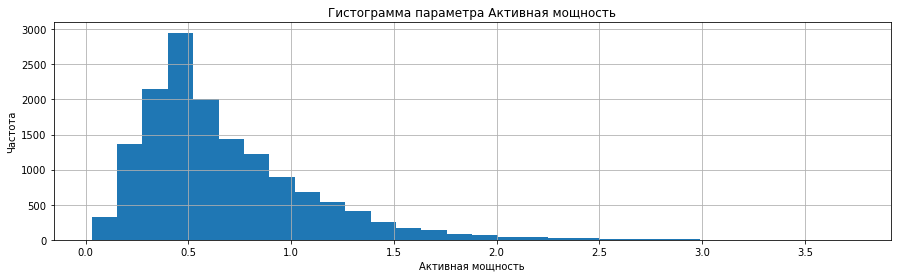

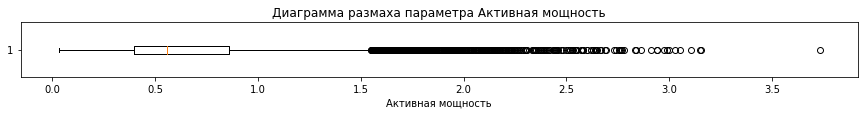

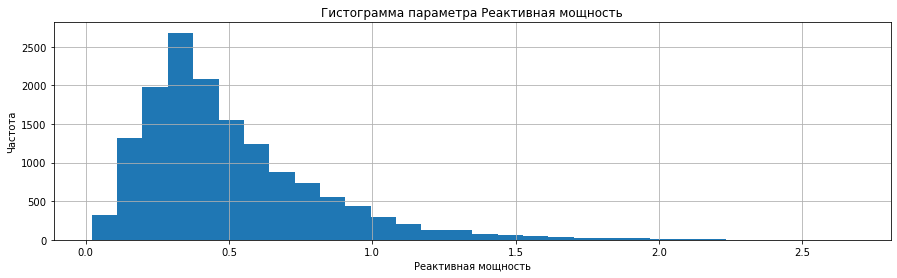

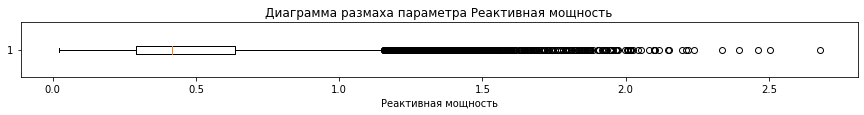

In [8]:
hist_plot(data_arc.loc[data_arc.iloc[:, 4] > 0], data_arc.columns[3:5], union=False)

Распределения похожи на нормальные, с длинным правым хвостом. Диаграммы распределения говорят нам о том, что это выбросы. Причем, их достаточно большое количество.

**План предобработки data_arc:**
- [x] Столбцы имеют некорректные названия. Переименовать, привести к нижнему регистру
- [ ] Обработать столбцы Начало/Конец нагрева дугой. Привести к datetime64
- [ ] Столбец Реактивная мощность - содержит высокое отрицательное значение. Обработать его и прочие выбросы.

### 2. data_bulk - данные о подаче сыпучих материалов (объем)

In [9]:
analisys(data_bulk)

Первые 5 строк таблицы:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

Основные статистики числовых параметров:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


Максимальное количество строк с пропусками: 3128

Количество дубликатов: 0


**План предобработки data_bulk:**
- [x] Столбцы имеют некорректные названия. Переименовать, привести к нижнему регистру
- [x] Большое количество пропусков. Так как это данные об объеме добавленных сыпучих материалов, можно предположить, что пропуски - это отсутствие добавок. Следовательно, можно заполнить Nan на 0 значение.
- [ ] Столбец Bulk-8 имеет единственное значение. Странно. Проверить.
- Количество ключей 3129 - в то время как максимальное значение ключа = 3241. Вероятно, есть этапы когда вообще не добавлялось никаких материалов в сплав.
- [ ] Отыскать различные типы стали по тому, какие типы сыпучих материалов добавлены в состав.

### 3. data_bulk_time - данные о подаче сыпучих материалов (время)

In [10]:
analisys(data_bulk_time, describe=False)

Первые 5 строк таблицы:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

Максимальное количество строк с пропусками: 3128

Количество дубликатов: 0


**План предобработки data_bulk_time:**<br>
Данные соответствуют по количеству значений таблице date_bulk. Возможно, эта таблица избыточна. Но мы составим план ее предобработки на случай, если она все-таки пригодится.
- [ ] Столбцы имеют некорректные названия. Переименовать, привести к нижнему регистру
- [ ] Данные содержат информацию о дате добавления сыпучих материалов. Привести тип object к типу datetime64
- [ ] Данные имеют большое количество пропусков. Чем их обработать пока неясно.

Некоторые материалы (напр. bulk_12, bulk_14, bulk_15) добавляются одновременно (судя по голове таблицы).

### 4. data_gas - данные о продувке сплава газом

In [11]:
analisys(data_gas)

Первые 5 строк таблицы:


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

Основные статистики числовых параметров:


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


Максимальное количество строк с пропусками: 0

Количество дубликатов: 0


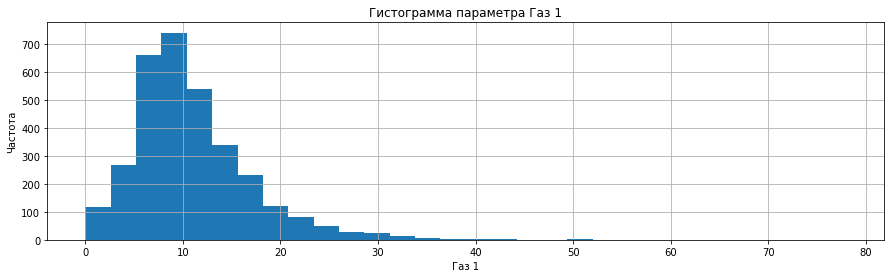

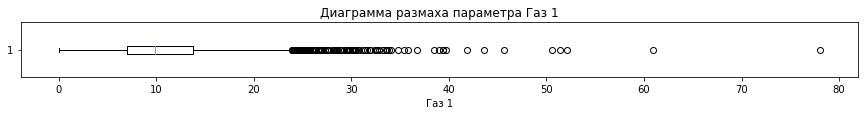

In [17]:
hist_plot(data_gas, [data_gas.columns[1]])

Наблюдаем распределение близкое к нормальному, с длинным правым хвостом в виде выбросов.

**План предобработки data_gas:**
- Количество ключей больше чем в предыдущих таблицах. Min / max значения совпадают. Вероятно, есть партии которые продувались газом, но в чей состав не добавлялось легирующих добавок.
- [x] Столбцы имеют некорректные названия. Переименовать, привести к нижнему регистру
- [ ] Обработать выбросы

### 5. data_temp - результаты измерения температуры. Целевая фича

In [14]:
analisys(data_temp)

Первые 5 строк таблицы:


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

Основные статистики числовых параметров:


,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


Максимальное количество строк с пропусками: 2901

Количество дубликатов: 0


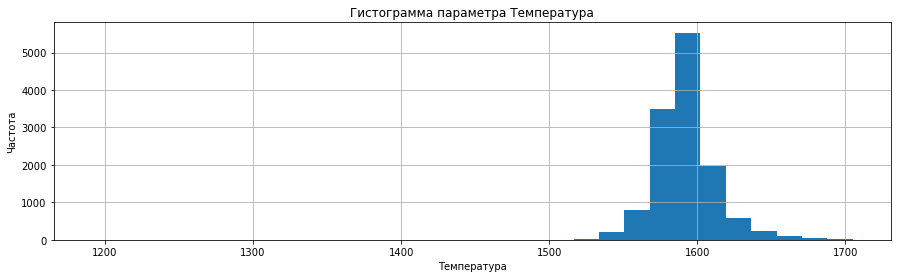

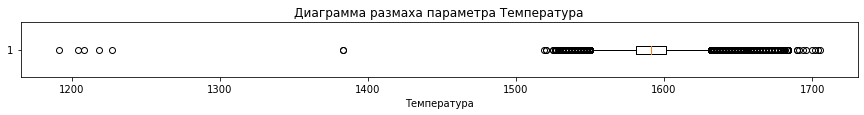

In [24]:
hist_plot(data_temp.dropna(axis=0), [data_temp.columns[2]])

Большая часть данных, визуально, распределена нормально. Однако, в хвостах содержиться большое количество аномалий. 

Согласно [wiki](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B0%D0%BB%D1%8C#:~:text=%D0%A2%D0%B5%D0%BC%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D1%83%D1%80%D0%B0%20%D0%BF%D0%BB%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F%3A%201450%E2%80%941520%20%C2%B0C.%20%D0%A3%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F,%D1%82%D0%B5%D0%BF%D0%BB%D0%BE%D0%BF%D1%80%D0%BE%D0%B2%D0%BE%D0%B4%D0%BD%D0%BE%D1%81%D1%82%D0%B8%20%D0%BF%D1%80%D0%B8%20%D1%82%D0%B5%D0%BC%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D1%83%D1%80%D0%B5%20100%20%C2%B0C%3A),
температура плавления стали: 1450—1520 °C. На производстве ковш всегда подогревается чтобы недопустить остывания стали. 
Поэтому, все что ниже 1450 °C - точно выбросы.

**План предобработки data_temp:**
- Min / max значения ключей совпадают с предыдущими таблицами.
- [ ] Есть несколько тысяч пропущеных значений температуры. Обработать пропуски.
- [ ] Изменить формат столбца "Время замера". Привести к datetime64
- [ ] Если последний замер температуры был раньше, чем нагрев ковша - удаляем информацию обо всей партии
- [ ] Обработать выбросы

### 6. data_wire - данные о проволочных материалах (объём)

In [757]:
analisys(data_wire)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060484,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


Количество строк с пропусками:
key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

Количество дубликатов:
0


**План предобработки data_wire:**

- [ ] Большое количество пропусков. Таблица несет информацию о проволочных материалах которые добавляют в состав слава. Поэтому отсутствие информации - означает нулевой объем добавок. Следовательно, заполняем пропуски нулями. 
- [ ] Использовать эти данные для определения типа стали.

### 7. data_wire_time - данные о проволочных материалах (время)

In [758]:
analisys(data_wire_time)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


Количество строк с пропусками:
key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

Количество дубликатов:
0


**План предобработки data_wire_time:**

Аналогичная data_wire таблица, несущая информацию о времени. Как и data_bulk_time может быть избыточной. Возможно пригодится для определения марки стали. 

- [ ] Большое количество пропусков. Обработать

## Предобработка данных

### Разбиение данных на train и test 

### Грубая предобработка train

### Предобработка train / test для машинного обучения

## Обучение моделей

### Выявление самых информативных фичей

### Обучение LinearRegression

### Обучение RandomForestRegressor

### Обучение CatBoostRegressor

### Обучение LightGBM

### Обучение XGBoost

## Тюнинг самой результативной модели

## Выводы